In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

sns.set()
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/Regression/train-data.csv')

In [3]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
selected_features = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
                    'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df_train = df_train[selected_features]
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [6]:
df_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [8]:
len(df_train)

5975

In [9]:
def convert_price_usd(price):
    # at the current time when assignment took place
    # 1 INR = 0.013
    return (price * 100000) * 0.013

df_train['USD_Price'] = df_train['Price'].apply(convert_price_usd)

df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,USD_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2275.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,16250.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,5850.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7800.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,23062.0


In [10]:
df_train = pd.get_dummies(df_train, columns=['Fuel_Type', 'Owner_Type', 'Transmission', 'Location'])
df_train.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,USD_Price,Fuel_Type_CNG,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,2275.0,1,...,0,0,0,0,0,0,0,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,16250.0,0,...,0,0,0,0,0,0,0,0,0,1
2,Honda Jazz V,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,5850.0,0,...,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,7800.0,0,...,0,1,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,23062.0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
counter = 0
def remove_cc(value):
    arr = value.split(' ')
#     print(arr)
#     if arr[1] != 'CC':
#         counter += 1
    return int(arr[0])
print(counter)
df_train['Engine'] = df_train['Engine'].apply(remove_cc)

df_train.head()

0


,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,USD_Price,Fuel_Type_CNG,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998,58.16 bhp,5.0,1.75,2275.0,1,...,0,0,0,0,0,0,0,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582,126.2 bhp,5.0,12.50,16250.0,0,...,0,0,0,0,0,0,0,0,0,1
2,Honda Jazz V,2011,46000,18.2 kmpl,1199,88.7 bhp,5.0,4.50,5850.0,0,...,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248,88.76 bhp,7.0,6.00,7800.0,0,...,0,1,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968,140.8 bhp,5.0,17.74,23062.0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
counter1 = 0
def remove_bph(value):
    arr = value.split(' ')
    if arr[0] == 'null':
        return None
    
    return float(arr[0])
print(counter1)
df_train['Power'] = df_train['Power'].apply(remove_bph)

df_train.head()

0


,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,USD_Price,Fuel_Type_CNG,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,Maruti Wagon R LXI CNG,2010,72000,26.6 km/kg,998,58.16,5.0,1.75,2275.0,1,...,0,0,0,0,0,0,0,0,1,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67 kmpl,1582,126.20,5.0,12.50,16250.0,0,...,0,0,0,0,0,0,0,0,0,1
2,Honda Jazz V,2011,46000,18.2 kmpl,1199,88.70,5.0,4.50,5850.0,0,...,0,1,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,2012,87000,20.77 kmpl,1248,88.76,7.0,6.00,7800.0,0,...,0,1,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.2 kmpl,1968,140.80,5.0,17.74,23062.0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
df_train.isnull().sum()

Name                           0
Year                           0
Kilometers_Driven              0
Mileage                        0
Engine                         0
Power                        103
Seats                          0
Price                          0
USD_Price                      0
Fuel_Type_CNG                  0
Fuel_Type_Diesel               0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Owner_Type_First               0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
Transmission_Automatic         0
Transmission_Manual            0
Location_Ahmedabad             0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
dtype: int

In [14]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Name                         0
Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
USD_Price                    0
Fuel_Type_CNG                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Owner_Type_First             0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Transmission_Automatic       0
Transmission_Manual          0
Location_Ahmedabad           0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
dtype: int64

In [15]:
# .506 with these features
# selected_features = ['Year', 'Kilometers_Driven', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
#                      'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
#                      'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Seats', 'Engine']

# .482 with these features
# selected_features = ['Year', 'Kilometers_Driven', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
#                      'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
#                      'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Seats', 'Engine',
#                     'Location_Ahmedabad',  'Location_Bangalore',  'Location_Chennai',  'Location_Coimbatore',
#                      'Location_Delhi',  'Location_Hyderabad',  'Location_Jaipur',  'Location_Kochi',  
#                      'Location_Kolkata',  'Location_Mumbai',  'Location_Pune']


selected_features = ['Year', 'Kilometers_Driven', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
                     'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
                     'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Seats', 'Engine', 'Power']

X = df_train[selected_features]
y = df_train['USD_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

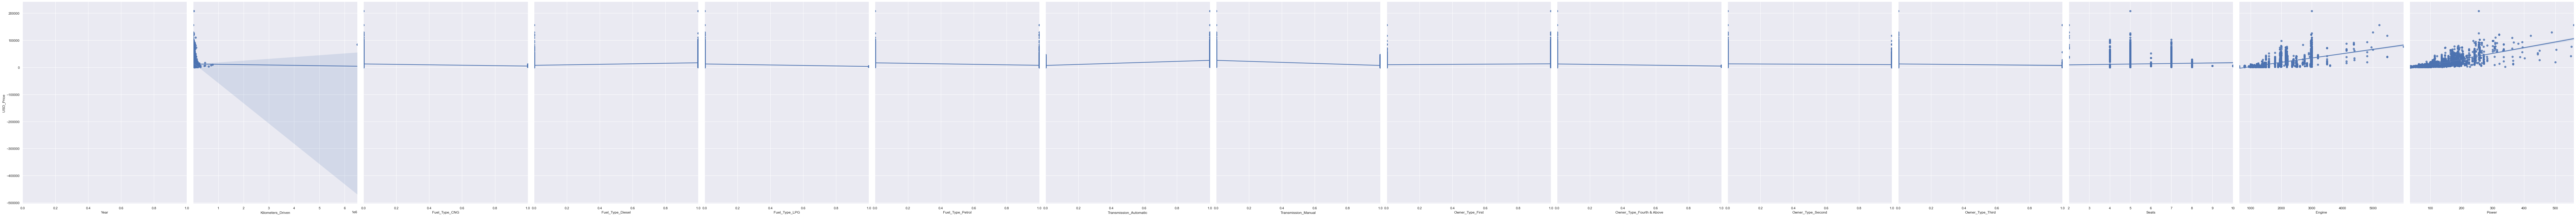

In [19]:
model.score(X_test, y_test)
sns.pairplot(df_train, x_vars=selected_features, y_vars=["USD_Price"],
             height=10, aspect=.8, kind="reg");